## Using data from a Kaggle data set:
https://www.kaggle.com/harlfoxem/housesalesprediction

### Feature Columns
#### id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [95]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [96]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


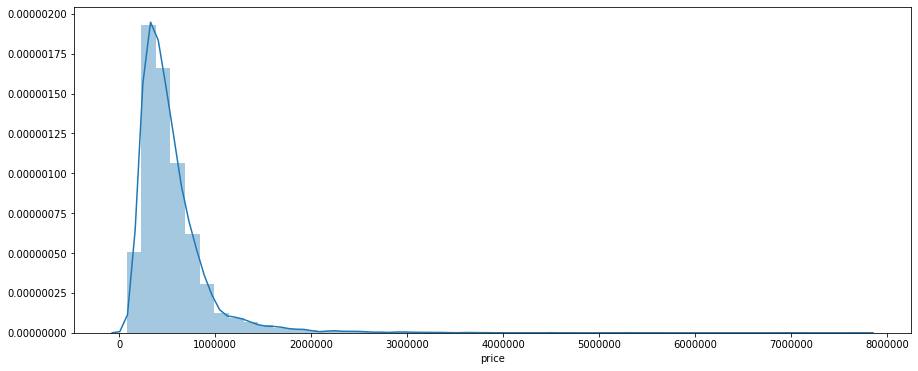

In [97]:
plt.figure(figsize=(15,6))
sns.distplot(df['price'])

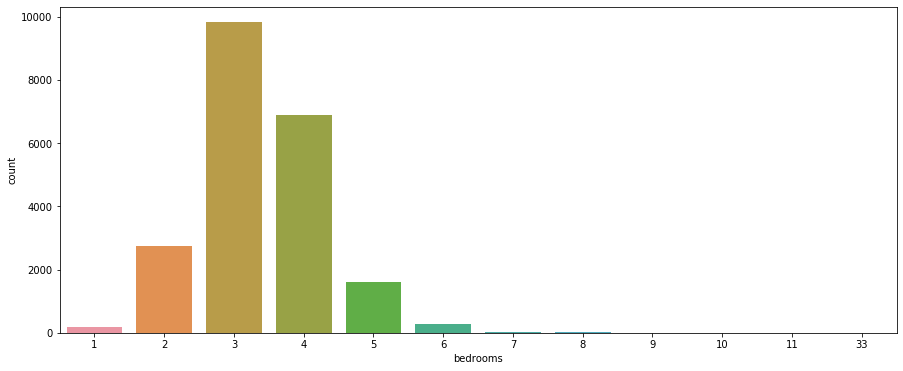

In [98]:
plt.figure(figsize=(15,6))
sns.countplot(df['bedrooms'])

In [99]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

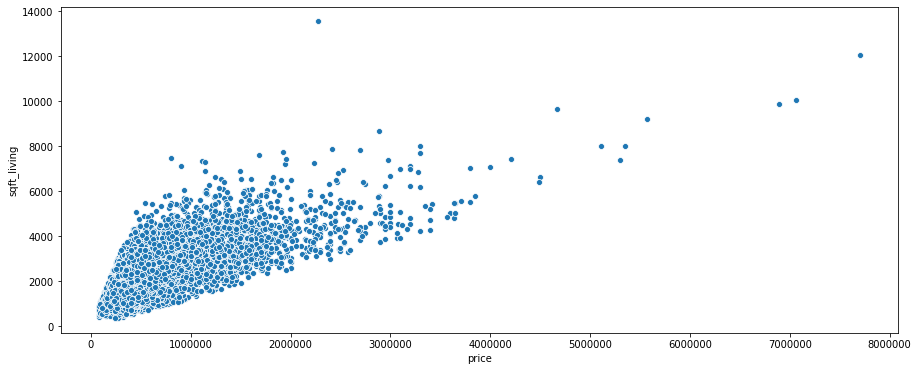

In [100]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='price',y='sqft_living',data=df)

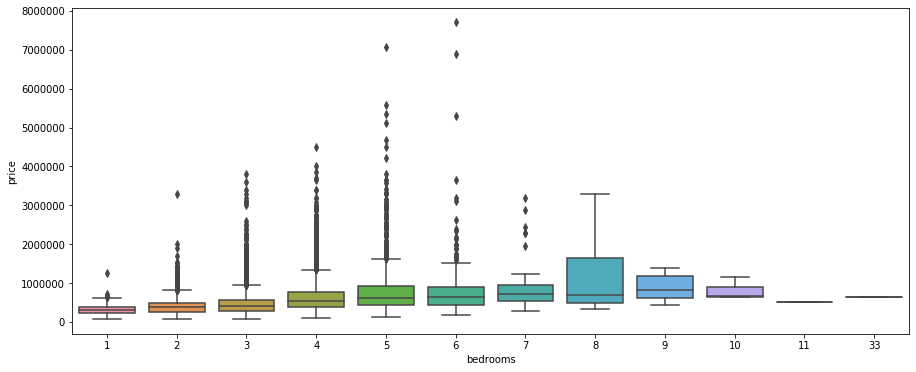

In [101]:
plt.figure(figsize=(15,6))
sns.boxplot(x='bedrooms',y='price',data=df)

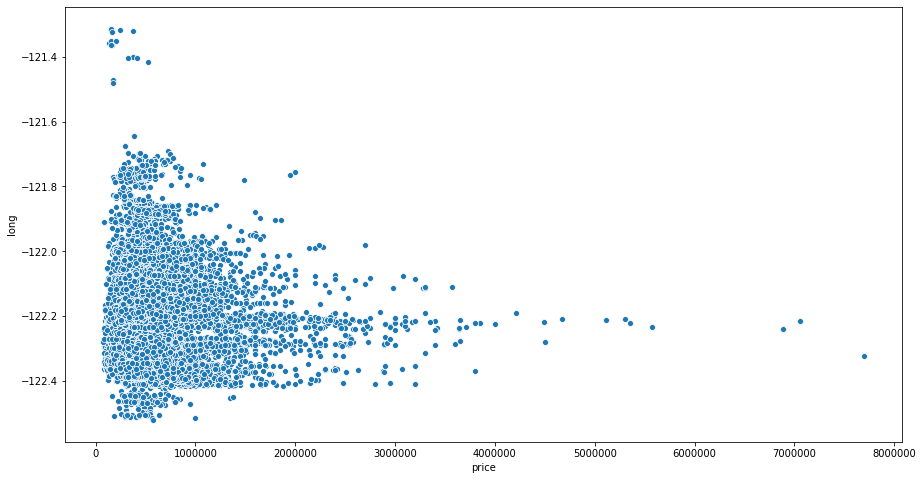

In [102]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='price',y='long',data=df)

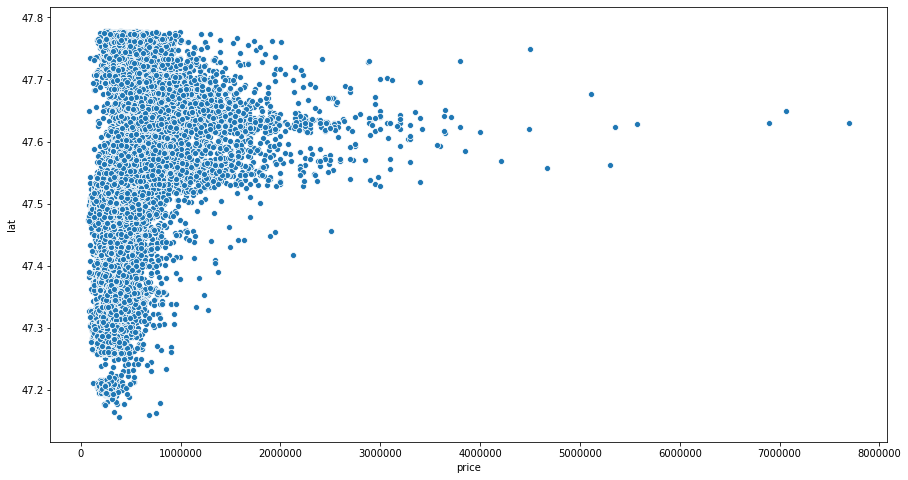

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='price',y='lat',data=df)

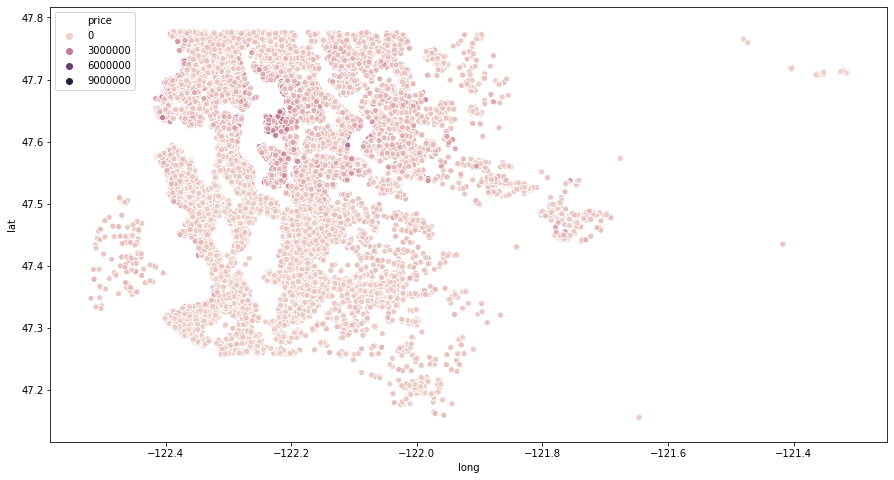

In [104]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [105]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [106]:
len(df)*0.01

215.97

In [107]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

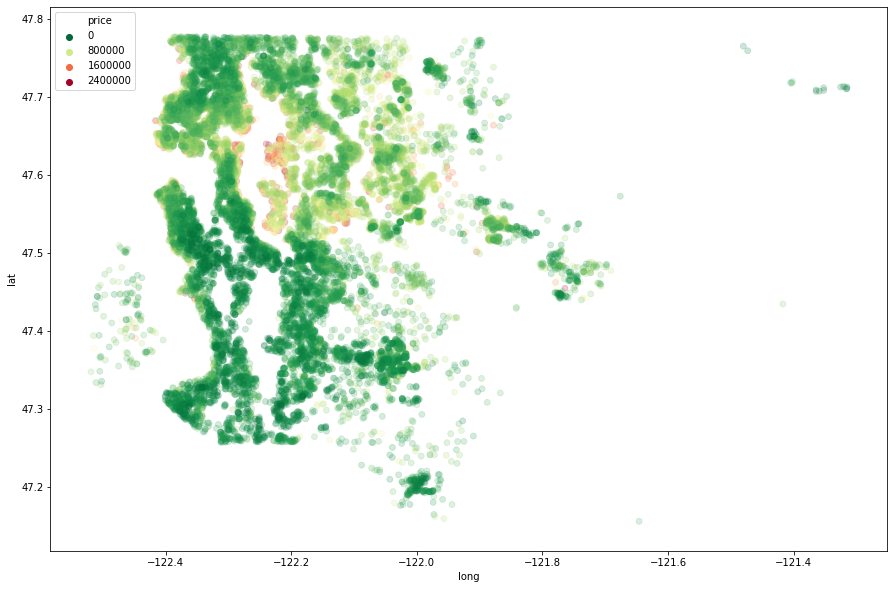

In [108]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
                edgecolor=None,alpha=0.2,hue='price',palette='RdYlGn_r')

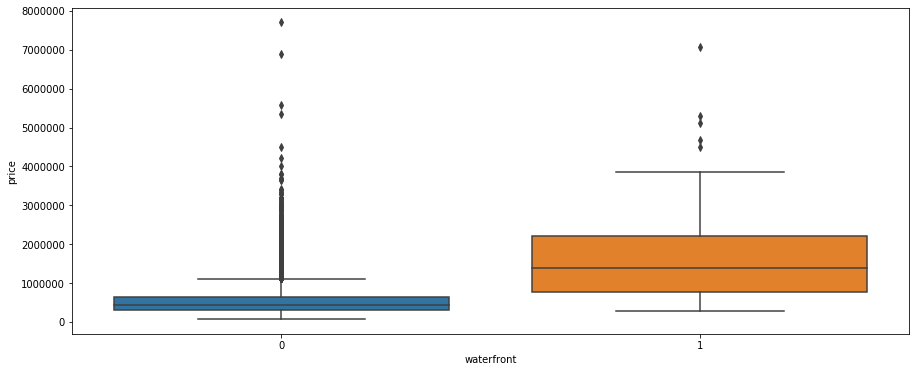

In [109]:
plt.figure(figsize=(15,6))
sns.boxplot(x='waterfront',y='price',data=df)

In [110]:
df = df.drop('id',axis=1)

In [111]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [112]:
# Feature engineering

df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


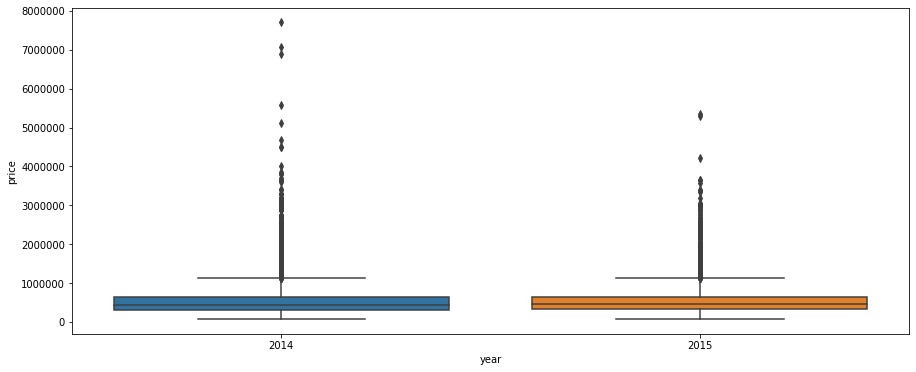

In [113]:
plt.figure(figsize=(15,6))
sns.boxplot(x='year',y='price',data=df)

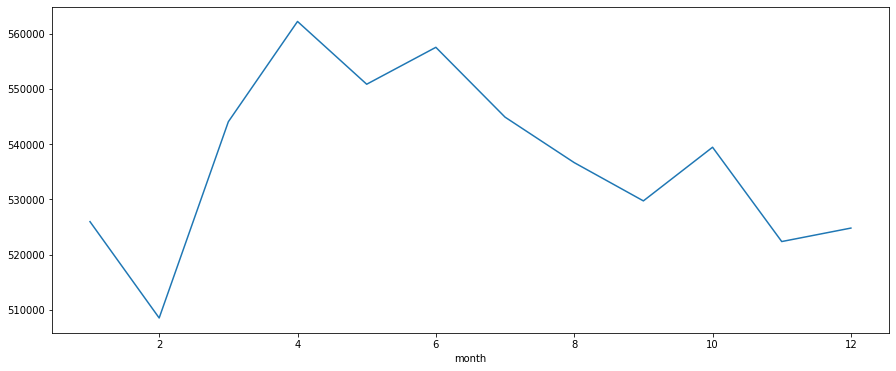

In [114]:
plt.figure(figsize=(15,6))
df.groupby('month').mean()['price'].plot()

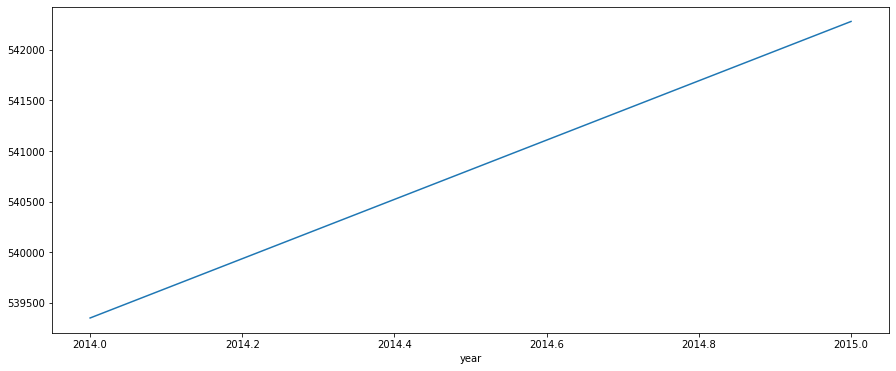

In [115]:
plt.figure(figsize=(15,6))
df.groupby('year').mean()['price'].plot()

In [116]:
df = df.drop('date',axis=1)

In [117]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [118]:
df = df.drop('zipcode',axis=1)

In [119]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [120]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [121]:
# Create Train and Test sets

X = df.drop('price',axis=1).values
y = df['price'].values

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [123]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
X_train.shape

(15117, 19)

In [125]:
# Create a Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

In [127]:
# Train Model

model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 146us/sample - loss: 430241904888.8705 - val_loss: 418931833828.1876
Epoch 2/400
15117/15117 [==============================] - 1s 38us/sample - loss: 429501595542.8701 - val_loss: 416353581647.6445
Epoch 3/400
15117/15117 [==============================] - 1s 35us/sample - loss: 418605720652.6120 - val_loss: 390938983072.5531
Epoch 4/400
15117/15117 [==============================] - 1s 37us/sample - loss: 361870381140.2664 - val_loss: 295380486240.0790
Epoch 5/400
15117/15117 [==============================] - 1s 35us/sample - loss: 228756364171.2869 - val_loss: 147604190286.3802
Epoch 6/400
15117/15117 [==============================] - 1s 35us/sample - loss: 118254169638.2383 - val_loss: 97008030049.9753
Epoch 7/400
15117/15117 [==============================] - 1s 35us/sample - loss: 98762504769.2659 - val_loss: 94559817151.5259
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 1s 64us/sample - loss: 39362720853.8244 - val_loss: 38062977443.7136
Epoch 65/400
15117/15117 [==============================] - 1s 53us/sample - loss: 39173367234.7984 - val_loss: 37875154185.4815
Epoch 66/400
15117/15117 [==============================] - 1s 38us/sample - loss: 38961835495.1739 - val_loss: 37713199144.4543
Epoch 67/400
15117/15117 [==============================] - 1s 39us/sample - loss: 38821221171.2271 - val_loss: 37529013907.9111
Epoch 68/400
15117/15117 [==============================] - 1s 41us/sample - loss: 38636485274.6804 - val_loss: 37334650349.0370
Epoch 69/400
15117/15117 [==============================] - 0s 32us/sample - loss: 38456991401.0071 - val_loss: 37163164816.1185
Epoch 70/400
15117/15117 [==============================] - 0s 33us/sample - loss: 38292047355.9696 - val_loss: 37000521419.5358
Epoch 71/400
15117/15117 [==============================] - 1s 34us/sample - loss: 38129206818.4449 - val_loss

15117/15117 [==============================] - 1s 38us/sample - loss: 33569590039.2173 - val_loss: 32237006554.7062
Epoch 128/400
15117/15117 [==============================] - 0s 32us/sample - loss: 33527084760.5255 - val_loss: 32207244062.9728
Epoch 129/400
15117/15117 [==============================] - 0s 33us/sample - loss: 33513037285.3450 - val_loss: 32183984846.0642
Epoch 130/400
15117/15117 [==============================] - 0s 33us/sample - loss: 33473509194.3259 - val_loss: 32186287870.1037
Epoch 131/400
15117/15117 [==============================] - 0s 33us/sample - loss: 33405905527.1856 - val_loss: 32073491827.6741
Epoch 132/400
15117/15117 [==============================] - 1s 34us/sample - loss: 33408801701.6371 - val_loss: 32034699810.1333
Epoch 133/400
15117/15117 [==============================] - 1s 36us/sample - loss: 33375955232.4297 - val_loss: 31995070322.4099
Epoch 134/400
15117/15117 [==============================] - 1s 35us/sample - loss: 33335804474.0856 - v

15117/15117 [==============================] - 1s 34us/sample - loss: 31991084680.8652 - val_loss: 30360909596.4444
Epoch 191/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31931156852.9671 - val_loss: 30345171550.8148
Epoch 192/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31931098637.0396 - val_loss: 30325201067.9309
Epoch 193/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31896674095.0273 - val_loss: 30382921151.5259
Epoch 194/400
15117/15117 [==============================] - 1s 34us/sample - loss: 31870790424.8769 - val_loss: 30311496746.9827
Epoch 195/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31847686974.9120 - val_loss: 30247289570.2914
Epoch 196/400
15117/15117 [==============================] - 0s 33us/sample - loss: 31824241749.0116 - val_loss: 30229139486.3407
Epoch 197/400
15117/15117 [==============================] - 1s 36us/sample - loss: 31813860141.8080 - v

15117/15117 [==============================] - 1s 35us/sample - loss: 31086700133.6413 - val_loss: 29244154629.6889
Epoch 254/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31041868678.6807 - val_loss: 29291472375.1506
Epoch 255/400
15117/15117 [==============================] - 1s 34us/sample - loss: 31046056968.4334 - val_loss: 29216993350.7951
Epoch 256/400
15117/15117 [==============================] - 1s 38us/sample - loss: 31028836807.0660 - val_loss: 29203378024.2963
Epoch 257/400
15117/15117 [==============================] - 1s 34us/sample - loss: 31033156178.1327 - val_loss: 29218781563.2593
Epoch 258/400
15117/15117 [==============================] - 1s 36us/sample - loss: 30976179507.0578 - val_loss: 29183318172.7605
Epoch 259/400
15117/15117 [==============================] - 1s 38us/sample - loss: 30973899221.3587 - val_loss: 29181979650.5284
Epoch 260/400
15117/15117 [==============================] - 1s 34us/sample - loss: 30947809387.7716 - v

15117/15117 [==============================] - 1s 35us/sample - loss: 30424799515.2139 - val_loss: 28608930247.1111
Epoch 317/400
15117/15117 [==============================] - 1s 42us/sample - loss: 30438600358.6024 - val_loss: 28466194244.8988
Epoch 318/400
15117/15117 [==============================] - 1s 37us/sample - loss: 30362860802.9636 - val_loss: 28436530557.7877
Epoch 319/400
15117/15117 [==============================] - 0s 32us/sample - loss: 30387590125.7784 - val_loss: 28431130998.2025
Epoch 320/400
15117/15117 [==============================] - 1s 38us/sample - loss: 30393915258.0814 - val_loss: 28469991975.1901
Epoch 321/400
15117/15117 [==============================] - 1s 40us/sample - loss: 30337849436.8015 - val_loss: 28459930252.3259
Epoch 322/400
15117/15117 [==============================] - 1s 37us/sample - loss: 30398725035.3949 - val_loss: 28381662726.3210
Epoch 323/400
15117/15117 [==============================] - 0s 32us/sample - loss: 30355903735.3126 - v

15117/15117 [==============================] - 1s 34us/sample - loss: 29880181492.7724 - val_loss: 27829115335.1111
Epoch 380/400
15117/15117 [==============================] - 1s 40us/sample - loss: 29872977813.9218 - val_loss: 27733452784.8296
Epoch 381/400
15117/15117 [==============================] - 1s 38us/sample - loss: 29870312209.7644 - val_loss: 27788465629.8667
Epoch 382/400
15117/15117 [==============================] - 0s 33us/sample - loss: 29909393458.6005 - val_loss: 27736082978.1333
Epoch 383/400
15117/15117 [==============================] - 1s 39us/sample - loss: 29869626628.7247 - val_loss: 27859820756.3852
Epoch 384/400
15117/15117 [==============================] - 1s 40us/sample - loss: 29852011428.7565 - val_loss: 27806478765.8272
Epoch 385/400
15117/15117 [==============================] - 1s 53us/sample - loss: 29869578250.8381 - val_loss: 27791739704.2568
Epoch 386/400
15117/15117 [==============================] - 1s 45us/sample - loss: 29828022786.0660 - v

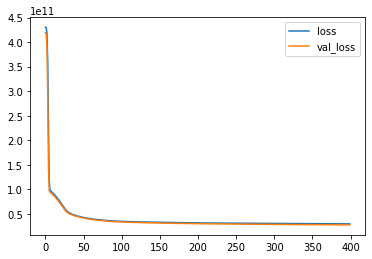

In [129]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [133]:
# Evaluate the Model

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

predictions = model.predict(X_test)
print('MAE :',mean_absolute_error(y_test,predictions))
print('MSE :',np.sqrt(mean_absolute_error(y_test,predictions)))
print('Variance :',explained_variance_score(y_test,predictions))

MAE : 102844.27014551987
MSE : 320.69342080173686
Variance : 0.7918553549946266


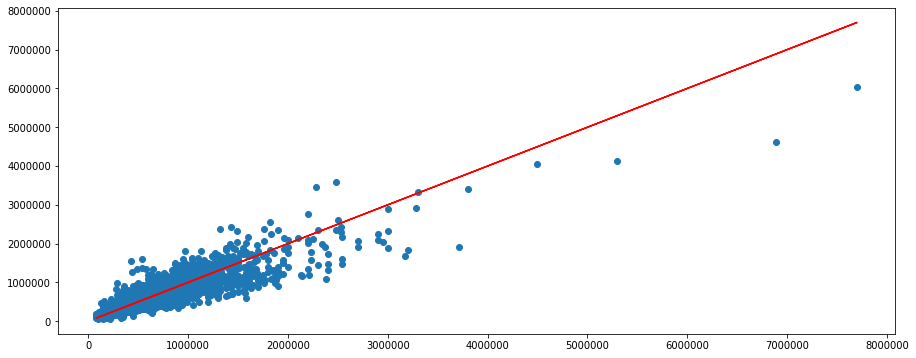

In [135]:
plt.figure(figsize=(15,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [137]:
# Predict New house

single_house = df.drop('price',axis=1).iloc[0]

In [141]:
single_house = scaler.transform(single_house.values.reshape(-1,19))
model.predict(single_house)

array([[284194.4]], dtype=float32)

In [142]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
